In [26]:
import pandas as pd
import numpy as np

In [27]:
donnees_mes = pd.read_csv("../data/donnees_mesures_PM2_5.csv",sep=';')
donnees_env = pd.read_csv("../data/donnees_environnement_capteurs.csv",sep=';')
donnees_mes

,Date,c1,c3,c5,c7,c8,c10,c11,c13,c14,...,c31,c87,c50,c51,c64,c73,c74,c75,c76,c90
0,01/01/2023 00:00,"4,678","4,496","4,505","4,607","2,79","4,222","5,668","5,769","4,416",...,"5,81","7,336","7,312","4,912","27,011","4,737","3,08","4,009","7,409","3,918"
1,01/01/2023 00:15,"4,439",NaN,NaN,"4,33","3,167","4,077","4,423","6,315","5,549",...,"5,732","8,24","5,48","5,259","30,192","4,764","3,168","3,999","7,021","4,132"
2,01/01/2023 00:30,"4,108",NaN,NaN,"4,547","3,081","3,871","4,744","5,356","4,775",...,"5,611",NaN,"7,717","4,599","19,42","4,922","3,194","4,231",NaN,"4,079"
3,01/01/2023 00:45,"4,713","4,339666667","3,982333333","4,688",NaN,"3,984","5,499","5,329","4,961",...,"5,717","8,4075","4,923","4,927","31,388","4,721","3,517","4,252","6,09","3,876"
4,01/01/2023 01:00,"4,172","3,716","4,088",NaN,"3,556","3,96","4,833","5,613","4,462",...,"5,858","8,764","4,211","4,539","25,864","4,651","3,121","4,141","6,178","3,59"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25779,26/09/2023 12:45,"1,768","1,892","1,529","2,483","1,824",NaN,"2,196",NaN,"2,567",...,"1,094","2,165","1,937","3,24","2,2635","5,485",NaN,"4,47","2,053","0,762"
25780,26/09/2023 13:00,"1,857","1,792","1,538","2,548","2,405",NaN,"2,262",NaN,"2,857",...,"1,145","2,192","2,532","2,328","2,269","2,182",NaN,"4,658","2,385","0,639"
25781,26/09/2023 13:15,"1,939","1,871","1,953","2,207","1,761",NaN,"2,056",NaN,"2,781",...,"1,52","2,282","3,054","2,312","2,606","2,625",NaN,"3,606","2,855","0,769"
25782,26/09/2023 13:30,"1,959",NaN,"2,028","2,415","1,844",NaN,"2,498",NaN,"2,914",...,"1,245","2,681","2,054","3,56","2,156","2,835",NaN,"2,318","3,037","1,56"


In [28]:
donnees_env = donnees_env.drop(donnees_env.columns[0:12], axis=1)


In [29]:
donnees_env

,Trafic_Routier_vehicule_leger,Trafic_Routier_poids_lourds,Trafic_Routier_2_roues,emission_moyenne_annuelle_kg_maille_an,Donnees_Cartographie
0,14 185,366,233,3242,32.400002
1,14 185,366,233,3242,32.400002
2,14 185,366,233,3242,26.799999
3,14 185,366,233,3242,37.000000
4,14 185,366,233,3242,27.500000
...,...,...,...,...,...
92,800,0,0,2991,26.100000
93,800,0,0,2991,27.100000
94,800,0,0,2270,19.799999
95,7 530,5,121,2270,23.299999


In [30]:
#Clean données:
donnees_env["Trafic_Routier_vehicule_leger"] = donnees_env["Trafic_Routier_vehicule_leger"].str.replace(' ', '')
donnees_env["Trafic_Routier_vehicule_leger"] = donnees_env["Trafic_Routier_vehicule_leger"].str.replace('�', '')

donnees_env["Trafic_Routier_vehicule_leger"] = donnees_env["Trafic_Routier_vehicule_leger"].astype(int)

donnees_env.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Trafic_Routier_vehicule_leger           97 non-null     int32  
 1   Trafic_Routier_poids_lourds             97 non-null     int64  
 2   Trafic_Routier_2_roues                  97 non-null     int64  
 3   emission_moyenne_annuelle_kg_maille_an  97 non-null     int64  
 4   Donnees_Cartographie                    97 non-null     float64
dtypes: float64(1), int32(1), int64(3)
memory usage: 3.5 KB


       Trafic_Routier_vehicule_leger  Trafic_Routier_poids_lourds  \
count                      97.000000                    97.000000   
mean                     6151.216495                   126.824742   
std                      7434.939875                   177.637037   
min                       800.000000                     0.000000   
25%                       800.000000                     0.000000   
50%                      3498.000000                     0.000000   
75%                      7530.000000                   226.000000   
max                     31424.000000                   646.000000   

       Trafic_Routier_2_roues  emission_moyenne_annuelle_kg_maille_an  \
count               97.000000                               97.000000   
mean                94.525773                             2671.577320   
std                125.879332                              607.813257   
min                  0.000000                              747.000000   
25%          

array([[<Axes: title={'center': 'Trafic_Routier_vehicule_leger'}>,
        <Axes: title={'center': 'Trafic_Routier_poids_lourds'}>],
       [<Axes: title={'center': 'Trafic_Routier_2_roues'}>,
        <Axes: title={'center': 'emission_moyenne_annuelle_kg_maille_an'}>],
       [<Axes: title={'center': 'Donnees_Cartographie'}>, <Axes: >]],
      dtype=object)

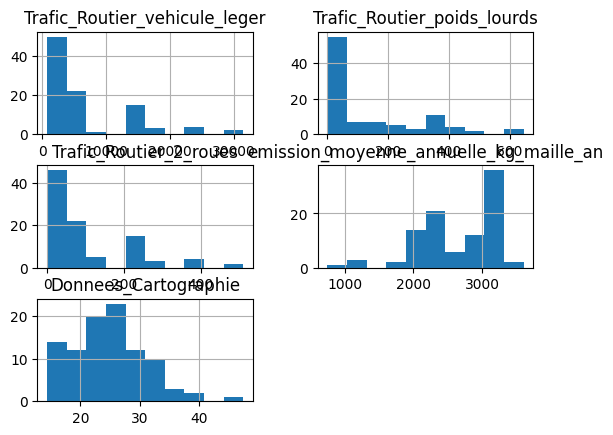

In [31]:
statistiques = donnees_env.describe()
print(statistiques)

donnees_env.hist()


In [33]:
donnees_mes = donnees_mes.drop(donnees_mes.columns[0], axis=1)
for nom_colonne in donnees_mes.columns:
    nombre_na = donnees_mes[nom_colonne].isna().sum()
    nombre_tot = donnees_mes[nom_colonne].count()
    if nombre_na/nombre_tot > 0.33 :
        donnees_mes = donnees_mes.drop(donnees_mes[nom_colonne], axis=1)
    else :
        donnees_mes[nom_colonne] = donnees_mes[nom_colonne].str.replace(',', '.').astype(float)
        donnees_mes[nom_colonne] = donnees_mes[nom_colonne].fillna(donnees_mes[nom_colonne].mean())
donnees_mes

AttributeError: Can only use .str accessor with string values!